In [3]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az
from collections import Counter

## Code 3.1

In [5]:
PrPV = .95
PrPM = .01
PrV = .001
PrP  = PrPV*PrV + PrPM*(1-PrV)
PrVP = PrPV*PrV / PrP
PrVP

0.08683729433272395

## Code 3.2

In [78]:
def grid_approx(grid_samp = 1000, n_trials = 9, n_success = 6):
    """Grid approximation for Bayes

    The posterior is a probability distribution that is proportional to the plausability of that parameter value.
    Here the parameter value is our p_grid, so p_grid values that are more likely are going to have be weighted
    higher in the posterior or probability distribution 
    
    :Params
    -------------------
    grid_samp - how many samples to take for our grid
    n_trials - how many times to did we spin the globe
    n_success - how many times did we land on water
    
    :Returns
    -------------------
    p_grid - the grid of prior paramter values supplied
    posterior - the posterior distribution or how plausible it is to see the data we saw given the parameter
    
   """
    # grid of probability values
    p_grid = np.linspace(0,1,num = grid_samp)
    
    #assume the prior is uniform distribution of 1
    prior = np.repeat(1,grid_samp)
   
    #likelihood we would see what we see given diffent p_values
    likelihood = stats.binom.pmf(n_success,n_trials,p_grid)
    unstd_post = likelihood * prior
    
    # post distribution
    post = unstd_post / np.sum(unstd_post)
    
    return p_grid, post

p_grid, posterior = grid_approx()

## Code 3.3

In [15]:
# we are going to choose n number of samples from the grid in relation to it's posterior probability
# What is the posterior? It's a probability distribution of our p_grid
# as the book states, imagine the posterior is a bucket full of parameter values, p_grid values
# within each bucket, each value exists in proportion to its posterior probability,
# such that values near the peak are much more common than those in the tails
samples = np.random.choice(p_grid,size = 10000,replace = True,p=posterior)

## Code 3.4

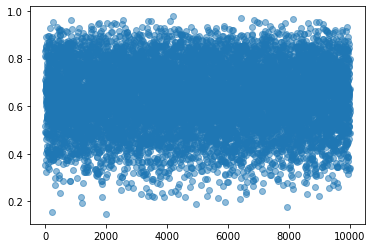

In [59]:
plt.plot(samples, alpha = 0.5, marker = 'o', linestyle = '')

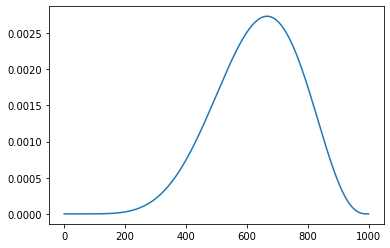

In [12]:
# the posterior is nothing more than a probability distribution.
# In this case it's the probability distribution of the proportion of water on the earth
plt.plot(posterior)
plt.show()

## Code 3.5

Text(0.5, 0, 'proportion of water (w)')

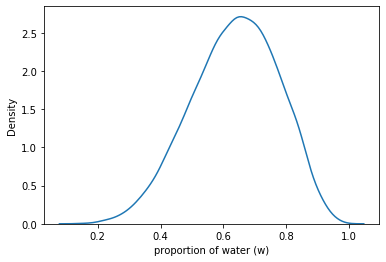

In [60]:
sns.distplot(samples, kde = True, hist=False)
plt.ylabel('Density')
plt.xlabel('proportion of water (w)')

## Code 3.6

In [61]:
np.sum(posterior[p_grid < .5])

0.17187458902022873

## Code 3.7

In [62]:
np.sum(samples < .5)/1e4

0.1702

## Code 3.8

In [64]:
np.sum((samples > .5) & (samples < .75))/len(samples)

0.6071

## Code 3.9 & 3.10

In [65]:
np.percentile(samples, 80)

0.7607607607607607

## Code  & 3.10

In [26]:
np.percentile(samples, [10,90])

array([0.44744745, 0.81181181])

# Code 3.11

In [75]:
water = 3
n_tosses = 3
n = 1000

p_grid2, posterior2 = grid_approx(grid_samp = n,n_trials=n_tosses, n_success = water)
samples2 = np.random.choice(p_grid2,size = 10000,replace = True,p=posterior2)

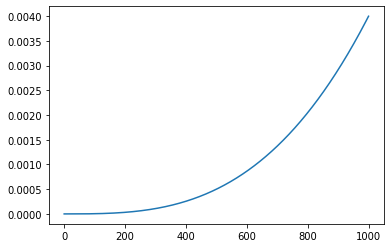

In [76]:
plt.plot(posterior2)
plt.show()

# Code 3.12

In [77]:
np.percentile(samples2, [25,75])

array([0.71171171, 0.93093093])

# Code 3.13

In [78]:
az.hpd(samples2, credible_interval=0.5)

array([0.84084084, 0.998999  ])

## Code 3.14

In [79]:
p_grid[posterior2 == np.max(posterior2)]

array([1.])

## Code 3.15

In [84]:
stats.mode(samples2)[1]

array([49])

## Code 3.16

In [83]:
np.median(samples2), np.mean(samples2)

(0.8423423423423424, 0.802562062062062)

## Code 3.17

In [85]:
np.sum(posterior2*np.abs(.5-p_gr))

0.31287518749981214

## Code 3.18

In [93]:
loss = [np.sum(posterior2*np.abs(i-p_grid2)) for i in p_grid2]

Text(0, 0.5, 'loss')

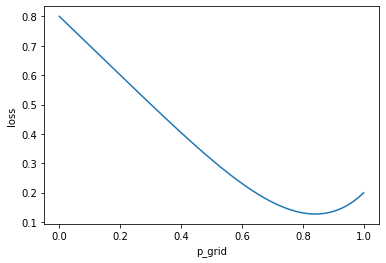

In [94]:
plt.plot(p_grid2,loss)
plt.xlabel('p_grid')
plt.ylabel('loss')

## Code 3.19

In [95]:
p_grid2[np.argmin(loss)]

0.8408408408408409

## Code 3.20

In [44]:
stats.binom.pmf(np.arange(0,3),2,p=0.7)

array([0.09, 0.42, 0.49])

## Code 3.21

In [46]:
stats.binom.rvs(size = 1, n = 2, p=.7)

array([2])

## Code 3.22

In [109]:
stats.binom.rvs(size = 10, n = 2, p=.7)

array([1, 2, 2, 1, 1, 2, 1, 1, 1, 0])

## Code 3.23

In [130]:
dummy_w = stats.binom.rvs(size = int(1e5), n = 2, p=.7)
Counter(dummy_w)

Counter({1: 41853, 2: 48939, 0: 9208})

## Code 3.24

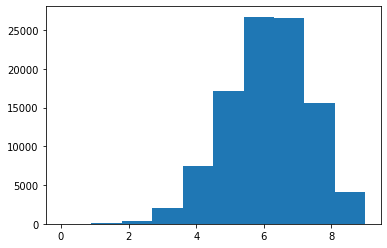

In [133]:
dummy_w = stats.binom.rvs(size = int(1e5), n = 9, p=.7)
plt.hist(dummy_w)
plt.show()

## Code 3.25

In [136]:
w = stats.binom.rvs(size = int(1e4), n = 9, p=.6)


## Code 3.26

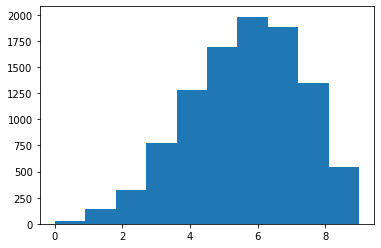

In [145]:
w = stats.binom.rvs(size = int(1e4), n = 9, p=samples)
plt.hist(w)
plt.show()

## Code 3.27

In [149]:
p_grid_prac, post_prac = grid_approx(grid_samp=1000, n_trials= 9, n_success=6)
samp_prac = np.random.choice(p_grid_prac,size = int(1e4),replace = True,p = post_prac)

In [152]:
np.sum(post_prac < np.percentile(post_prac,20)), np.sum(post_prac > np.percentile(post_prac,80))

(200, 200)

# Chapter 3 Practice questions

## Easy

### 3E1

In [163]:
np.sum(samp_prac < .2) / len(samp_prac)

0.0009

### 3E2

In [164]:
np.sum(samp_prac > .8) / len(samp_prac)

0.1195

### 3E3

In [165]:
np.sum((samp_prac < .8) & (samp_prac > .2)) / len(samp_prac)

0.8796

### 3E4

In [166]:
np.percentile(samp_prac, 20)

0.5135135135135135

### 3E5

In [167]:
np.percentile(samp_prac, 80)

0.7617617617617618

### 3E6

In [169]:
az.hpd(samp_prac, credible_interval=0.66)

array([0.51851852, 0.79279279])

### 3E7

In [180]:
np.percentile(samp_prac,[(((1-.66)/2))*100,(1-((1-.66)/2))*100] )

array([0.4964965 , 0.77377377])

### 3M1

In [17]:
n_water = 8
n_tosses = 15
p_grid3, posterior3 = grid_approx(n_trials=n_tosses,n_success=n_water)

### 3M2

In [33]:
samples3 = np.random.choice(p_grid3,size = int(1e4),replace=True,p = posterior3)
az.hpd(samples3, credible_interval=.9)

array([0.33433433, 0.72072072])

### 3M3

In [39]:
post_check= stats.binom.rvs(size = len(samples3), n = 15, p=samples3)
np.mean(post_check == 8)

0.1506

### 3M4

In [47]:
post_check2 = stats.binom.rvs(size = len(samples3), n = 9, p=samples3)
np.mean(post_check2 == 6)

0.1773

### 3M5

In [70]:
grid_samp = 1000
n_success = 8
n_trials = 15

# grid of probability values
p_grid = np.linspace(0,1,num = grid_samp)
p_grid = np.where(p_grid < .5, 0, p_grid)

#assume the prior is uniform distribution of 1
prior = np.repeat(1,grid_samp)

#likelihood we would see what we see given diffent p_values
likelihood = stats.binom.pmf(n_success,n_trials,p_grid)
unstd_post = likelihood * prior

# post distribution
posterior4 = unstd_post / np.sum(unstd_post)

In [71]:
samples_3m5 = np.random.choice(p_grid, size = int(grid_samp),replace = True, p = posterior4)
az.hpd(samples_3m5, credible_interval=.9)

array([0.5005005 , 0.71271271])

In [72]:
post_check_3m5 = stats.binom.rvs(size = len(samples_3m5), n = n_trials, p = samples_3m5)
np.mean(post_check_3m5 == 8)

0.156

In [73]:
n_trials = 9
n_success = 6
post_check_3m5 = stats.binom.rvs(size = len(samples_3m5), n = n_trials, p = samples_3m5)
np.mean(post_check_3m5 == 6)

0.226

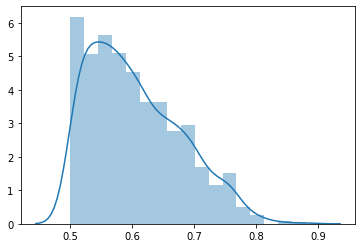

In [75]:
sns.distplot(samples_3m5)